In [41]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import pickle
import random

from sklearn import metrics

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [28]:
# read data
data = pd.read_csv('data.csv', error_bad_lines=False)
data.dropna(inplace=True) # remove nan values

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

<AxesSubplot:xlabel='strength', ylabel='count'>

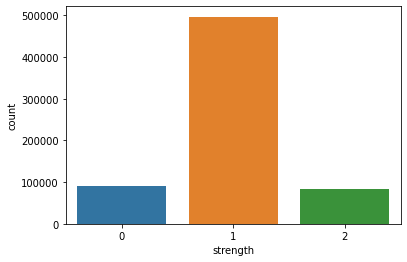

In [29]:
# distribution
sns.countplot(data['strength'])

In [30]:
password_tuple = np.array(data) # convert into numpy array

In [31]:
random.shuffle(password_tuple)

In [32]:
x = [labels[0] for labels in password_tuple]
y = [labels[1] for labels in password_tuple]

In [33]:
# NATURAL LANGUAGE PROCESSING #
# Term Frequency-Inverse Documet Frequency - value increases proportionally to the number of times a word appears in the document
#   1. Term Frequency: number of times a word appears in a document divided by total number of words
#   2. Inverse Document Frequency: logarithm of the number of the documents in the corpus divided by number of documents where specific term appears

In [34]:
# tokenization
def tokenization(word):
    tokens = []
    for ch in word:
        tokens.append(ch)
    return tokens

In [35]:
# vectorization
vectorizer = TfidfVectorizer(tokenizer=tokenization) # text transformed into numbers
X = vectorizer.fit_transform(x)

In [36]:
first = X[0]
first.T.todense()
tf_idf = pd.DataFrame(first.T.todense(), index=vectorizer.get_feature_names(), columns=['TF-IDF'])
tf_idf.sort_values(by=['TF-IDF'], ascending=False)

,TF-IDF
7,0.591574
5,0.566337
z,0.336690
k,0.291915
d,0.285869
...,...
<,0.000000
;,0.000000
9,0.000000
8,0.000000


In [37]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
# logistic regression
lg = LogisticRegression(random_state=0, multi_class='multinomial')
lg.fit(X_train, y_train)

# accuracy
y_pred = lg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(round(accuracy * 100, 2)) + '%')


Accuracy: 81.99%


In [39]:
# modelling experiment
models = {
    'Logistic Regression': LogisticRegression(random_state=0, multi_class='multinomial'),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42),
    'Random Forest': RandomForestClassifier(criterion='entropy', random_state=0)
}

for model, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Evaluate model: {}".format(model))

    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy: ' + str(round(accuracy * 100, 2)) + '%')

Evaluate model: Logistic Regression
Accuracy: 81.99%
Evaluate model: Naive Bayes
Accuracy: 74.44%
Evaluate model: Decision Tree
Accuracy: 78.23%
Evaluate model: Random Forest
Accuracy: 98.32%


In [43]:
# test hyperparamteters
hyperparameters = dict(
    n_estimators = [int (x) for x in np.linspace(start=100, stop=200, num=5)], # number of subtrees
    max_depth = [int (x) for x in np.linspace(10, 110, num=5)] + [None], # maximum depth of a subtree
    min_samples_split = [2, 10, 15, 30],
    min_samples_leaf = [2, 10, 15, 30]
)

clf = RandomForestClassifier(criterion='entropy', random_state=123)
clf_tuned = RandomizedSearchCV(clf, hyperparameters, cv = 3, random_state=12, scoring='f1_micro', n_iter=4)
clf_tuned.fit(X_train, y_train)

y_pred = clf_tuned.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("accuracy: " + str(round(accuracy * 100, 2)) + '%')

accuracy: 97.05%


In [45]:
for key, value in hyperparameters.items() :
    print(key + ": ", clf_tuned.best_estimator_.get_params()[key])

n_estimators:  175
max_depth:  85
min_samples_split:  15
min_samples_leaf:  2


In [1]:
clf.predict("hi")

NameError: name 'clf' is not defined